In [1]:
import mikeio

In [2]:
ds = mikeio.read("gefs.dfs2")
ds

<mikeio.Dataset>
Dimensions: (time:65, y:61, x:120)
Time: 2021-02-09 00:00:00 - 2021-02-25 00:00:00 (65 records)
Items:
  0:  MSLP <Air Pressure> (hectopascal)
  1:  U 10m <Wind Velocity> (meter per sec)
  2:  V 10m <Wind Velocity> (meter per sec)

In [3]:
ds.MSLP

<mikeio.DataArray>
Name: MSLP
Dimensions: (time:65, y:61, x:120)
Time: 2021-02-09 00:00:00 - 2021-02-25 00:00:00 (65 records)

In [4]:
ds.MSLP.type

Air Pressure

In [5]:
ds.MSLP.unit

hectopascal

In [6]:
ds.MSLP.geometry

<mikeio.Grid2D>
x-axis: nx=120 points from x0=-30 to x1=29.5 with dx=0.5
y-axis: ny=61 points from y0=40 to y1=70 with dy=0.5
Number of grid points: 7320

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

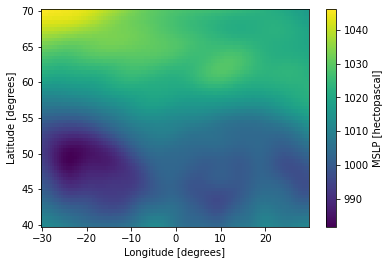

In [7]:
ds.MSLP.plot()

In [8]:
ds.dims

('time', 'y', 'x')

In [9]:
da = ds.MSLP.isel(0,axis="y")
da

<mikeio.DataArray>
Name: MSLP
Dimensions: (time:65, x:120)
Time: 2021-02-09 00:00:00 - 2021-02-25 00:00:00 (65 records)

In [10]:
da.dims

('time', 'x')

In [11]:
da.geometry

<mikeio.Grid1D>
axis: nx=120 points from x0=-30 to x1=29.5 with dx=0.5

In [12]:
da.to_dfs("mslp_sel_line.dfs1")

In [13]:
mikeio.read("mslp_sel_line.dfs1")

<mikeio.Dataset>
Dimensions: (time:65, x:120)
Time: 2021-02-09 00:00:00 - 2021-02-25 00:00:00 (65 records)
Items:
  0:  MSLP <Air Pressure> (hectopascal)

<AxesSubplot:xlabel='x', ylabel='MSLP [hectopascal]'>

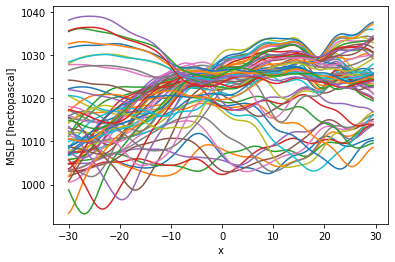

In [14]:
da.plot()

<AxesSubplot:xlabel='time', ylabel='MSLP [hectopascal]'>

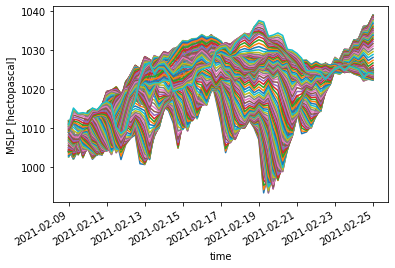

In [15]:
da.plot.line()

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

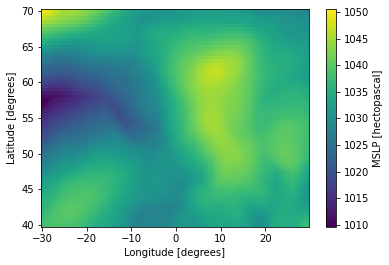

In [16]:
ds.MSLP.max(axis="time").plot()

<AxesSubplot:xlabel='time', ylabel='MSLP [hectopascal]'>

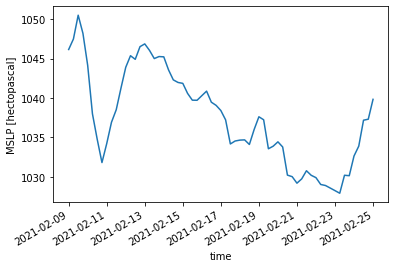

In [17]:
ds.MSLP.max(axis="space").plot()

In [18]:
ds.MSLP.max(axis="space").to_dfs("gefs_max_space.dfs0")

In [19]:
mikeio.read("gefs_max_space.dfs0")

<mikeio.Dataset>
Dimensions: (time:65)
Time: 2021-02-09 00:00:00 - 2021-02-25 00:00:00 (65 records)
Items:
  0:  MSLP <Air Pressure> (hectopascal)

In [20]:
ds = mikeio.read("2D.dfsu")
ds

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:8761, element:3921)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (8761 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  Depth averaged U velocity <u velocity component> (meter per sec)
  3:  Depth averaged V velocity <v velocity component> (meter per sec)

In [21]:
ds.Surface_elevation

<mikeio.DataArray>
Name: Surface elevation
Geometry: Dfsu2D
Dimensions: (time:8761, element:3921)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (8761 records)

In [22]:
ds.Surface_elevation.geometry

Flexible Mesh Geometry
Number of nodes: 2408
Number of elements: 3921
Projection: PROJCS["UTM-32",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",9],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

<AxesSubplot:title={'center':'Bathymetry'}>

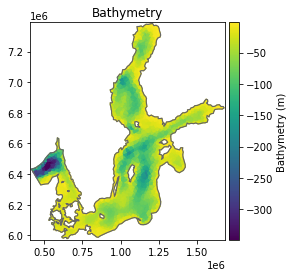

In [23]:
ds.Surface_elevation.geometry.plot()

<AxesSubplot:title={'center':'2017-01-01 00:00:00'}>

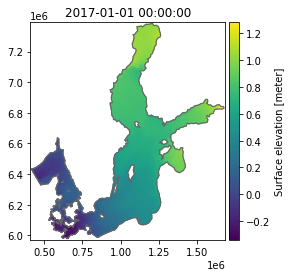

In [24]:
ds.Surface_elevation.plot()

<AxesSubplot:title={'center':'2017-06-01 00:00:00'}>

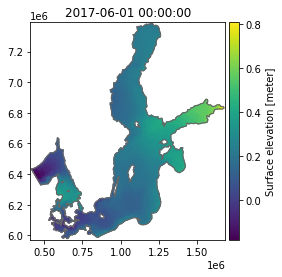

In [25]:
ds.Surface_elevation.sel(time="2017-06-01").plot()

In [26]:
ds.Surface_elevation

<mikeio.DataArray>
Name: Surface elevation
Geometry: Dfsu2D
Dimensions: (time:8761, element:3921)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (8761 records)

In [27]:
ds.Surface_elevation.max()

<mikeio.DataArray>
Name: Surface elevation
Geometry: Dfsu2D
Dimensions: (element:3921)
Time: 2017-01-01 00:00:00 (time-invariant)

<AxesSubplot:title={'center':'2017-01-01 00:00:00'}>

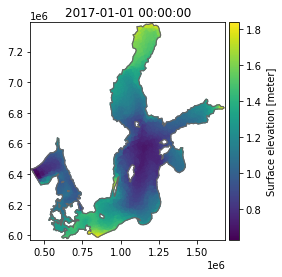

In [28]:
ds.Surface_elevation.max().plot()

In [29]:
ds.Surface_elevation.max().to_dfs("max_surface_elevation.dfsu")

<AxesSubplot:title={'center':'MAX Water level (2017)'}>

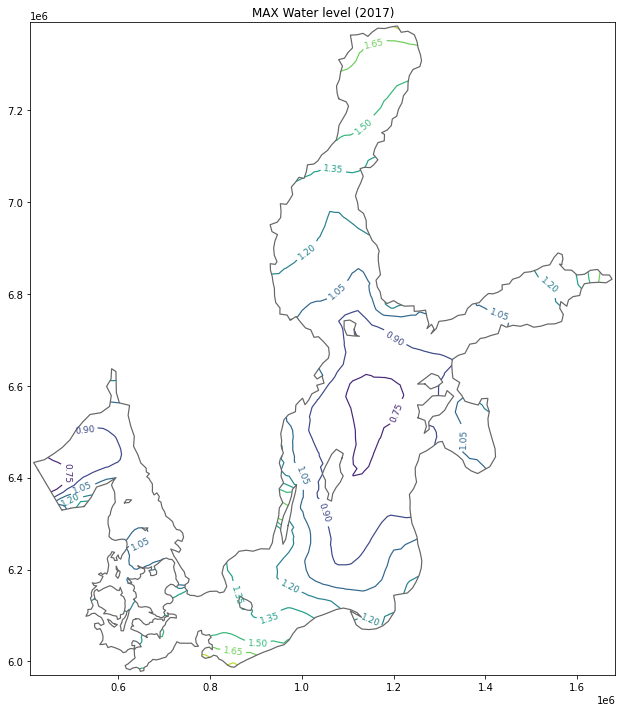

In [30]:
ds.Surface_elevation.max().plot.contour(title="MAX Water level (2017)", figsize=(12,12))

<AxesSubplot:title={'center':'MAX Water level (2017)'}>

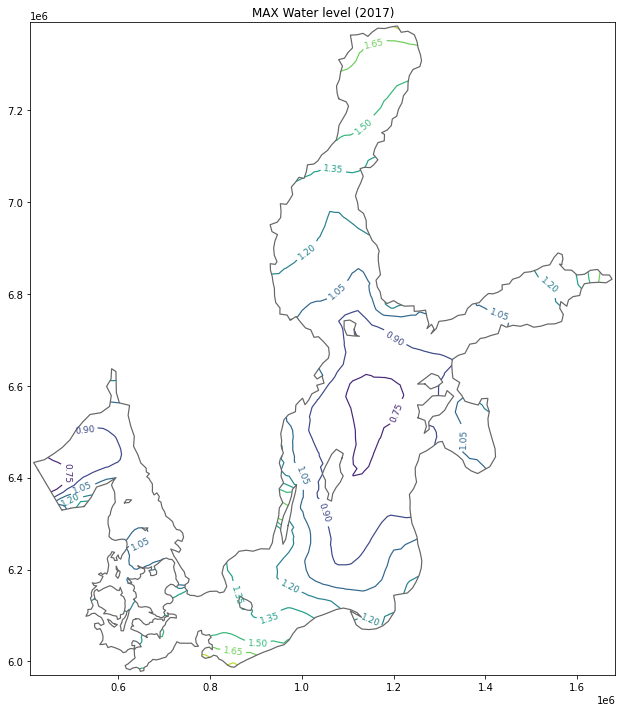

In [31]:
(ds.Surface_elevation
   .max()
   .plot
   .contour(title="MAX Water level (2017)", figsize=(12,12))
)

In [32]:
ds = mikeio.read("3D.dfsu", items=["Salinity", "Temperature"])
ds

<mikeio.Dataset>
Geometry: Dfsu3DSigmaZ (5 sigma-layers, 170 z-layers)
Dimensions: (time:2921, element:71557)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (2921 records)
Items:
  0:  Salinity <Salinity> (PSU)
  1:  Temperature <Temperature> (degree Celsius)

<AxesSubplot:title={'center':'Surface, 2017-01-01 00:00:00'}>

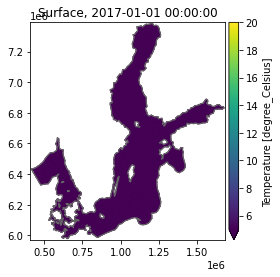

In [33]:
ds.Temperature.min().plot(vmin=5,vmax=20)

<AxesSubplot:title={'center':'Surface, 2017-01-01 00:00:00'}>

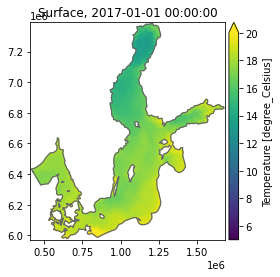

In [34]:
ds.Temperature.max().plot(vmin=5,vmax=20)

In [35]:
ds.interp(x=1.e6,y=6.2e6)

<mikeio.Dataset>
Dimensions: (time:2921)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (2921 records)
Items:
  0:  Salinity <Salinity> (PSU)
  1:  Temperature <Temperature> (degree Celsius)

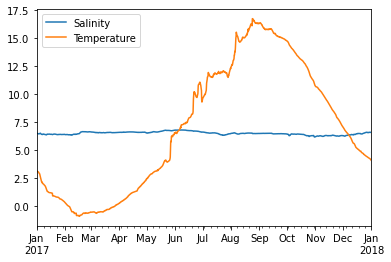

In [36]:
ds.interp(x=1.e6,y=6.2e6).plot()

In [37]:
ds.interp(x=1.e6,y=6.2e6).geometry

GeometryPoint2D(x=1000000.0, y=6200000.0)

In [38]:
ds.interp(x=1.e6,y=6.2e6).to_dfs("my_station.dfs0")

In [39]:
mikeio.read("my_station.dfs0")

<mikeio.Dataset>
Dimensions: (time:2921)
Time: 2017-01-01 00:00:00 - 2018-01-01 00:00:00 (2921 records)
Items:
  0:  Salinity <Salinity> (PSU)
  1:  Temperature <Temperature> (degree Celsius)

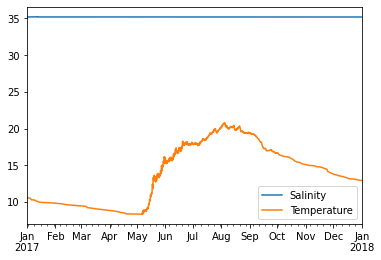

In [40]:
ds.max(axis="space").plot()

In [41]:
ds.max(axis="space").geometry

GeometryUndefined()